<a href="https://colab.research.google.com/github/TeoTheMayo/DataScienceLondon-Teo/blob/main/milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collaborators: Teo and London


Link: https://teothemayo.github.io/DataScienceLondon-Teo/



# Analysing and Predicting the Change in Annual global Temeperatures

# Introduction and Research Questions

 Research Questions:

  How do rising sea levels correlate with global average temperatures across different years?

     Rising sea levels are one of the most pressing environmental impacts of climate change. By analyzing the correlation between the global mean sea level (GMSL) and average global temperatures, we can better understand the impact of temperature increases on sea levels.
        The temperature dataset (from palinatx/mean-temperature-for-countries-by-year-2014-2022) provides valuable insight into the yearly trends in global temperature, while the sea level dataset (from kkhandekar/global-sea-level-1993-2021) tracks changes in the global mean sea level over time.

  Which regions are experiencing the greatest rise in sea levels and the highest average temperatures?

    This question aims to uncover regional disparities in the effects of climate change. By analyzing the temperature and sea level data at the country level (merged for comparison), we can identify which areas are most vulnerable to climate impacts like flooding due to rising sea levels.
        The merged data helps connect temperature and sea level data at the country-year level, allowing for direct comparison.

Why This Data Is Correct:

    The Global Mean Sea Level dataset is sourced from credible research and tracks the rise in sea levels due to thermal expansion and ice melt from the polar regions.
    The Mean Temperature dataset is based on real, reliable temperature records sourced from global climate databases, and it aligns well with the sea level dataset for analysis.
    The Fossil CO2 Emissions dataset provides information on carbon emissions, which is another crucial factor in climate change modeling, particularly because CO2 is a primary driver of global warming.
    These datasets are correctly aligned by the Year column, allowing for direct comparisons and valid merged data analysis.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub


path1 = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")
path2 = kagglehub.dataset_download("palinatx/mean-temperature-for-countries-by-year-2014-2022")

print("Path to dataset files:", path1)

print("Path to dataset files:", path2)

path = kagglehub.dataset_download("kkhandekar/global-sea-level-1993-2021")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2
Path to dataset files: /root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3
Path to dataset files: /root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2


In [ ]:
!cd /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2
!ls /root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv

!cd /root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2
!ls /root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2

/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

cityTemp = pd.read_csv('/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv')
cityTemp = pd.DataFrame(cityTemp)


display(cityTemp.tail(5).reset_index())
display(cityTemp.dtypes)


,index,Country,Year,Annual Mean,5-yr smooth,Code
0,20735,Switzerland,2018,7.68,7.27,CHE
1,20736,Switzerland,2019,7.31,7.34,CHE
2,20737,Switzerland,2020,7.64,7.38,CHE
3,20738,Switzerland,2021,6.39,7.42,CHE
4,20739,Switzerland,2022,8.08,7.44,CHE


,0
Country,object
Year,int64
Annual Mean,float64
5-yr smooth,float64
Code,object


Graphs averagure temperatures for the Hottest Country and Coldest Country

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

cityTemp = pd.read_csv('/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv')
cityTemp = pd.DataFrame(cityTemp)


display(cityTemp.tail(5).reset_index())
display(cityTemp.dtypes)


filtered_cityTemp = cityTemp[cityTemp['Year'] > 2020]

display(filtered_cityTemp.head(5).reset_index())

,index,Country,Year,Annual Mean,5-yr smooth,Code
0,20735,Switzerland,2018,7.68,7.27,CHE
1,20736,Switzerland,2019,7.31,7.34,CHE
2,20737,Switzerland,2020,7.64,7.38,CHE
3,20738,Switzerland,2021,6.39,7.42,CHE
4,20739,Switzerland,2022,8.08,7.44,CHE


,0
Country,object
Year,int64
Annual Mean,float64
5-yr smooth,float64
Code,object


,index,Country,Year,Annual Mean,5-yr smooth,Code
0,120,Dominican Republic,2021,24.75,24.69,DOM
1,121,Dominican Republic,2022,24.57,24.56,DOM
2,242,United States,2021,10.01,9.85,USA
3,243,United States,2022,9.73,9.68,USA
4,364,Zambia,2021,22.11,22.03,ZMB


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sealevel_data = pd.read_csv('/root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2/sealevel.csv')
sealevel_data = pd.DataFrame(sealevel_data)


display(sealevel_data.tail(5).reset_index())
display(sealevel_data.dtypes)



filtered_sealevel_data = sealevel_data[sealevel_data['Year'] > 2000]


display(filtered_sealevel_data.head(5).reset_index())


,index,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1,1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
2,1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
3,1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36
4,1047,2021,335065.19,50.07,82.04,49.51,57.01,82.10,56.43,59.98


,0
Year,int64
TotalWeightedObservations,float64
GMSL_noGIA,float64
StdDevGMSL_noGIA,float64
SmoothedGSML_noGIA,float64
GMSL_GIA,float64
StdDevGMSL_GIA,float64
SmoothedGSML_GIA,float64
SmoothedGSML_GIA_sigremoved,float64


,index,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,295,2001,325869.69,-17.09,80.42,-17.02,-15.14,80.47,-15.07,-14.73
1,296,2001,271780.09,-16.37,85.58,-17.06,-14.38,85.59,-15.10,-14.31
2,297,2001,329342.41,-17.42,81.77,-17.01,-15.46,81.73,-15.05,-13.92
3,298,2001,330595.41,-16.58,82.50,-16.85,-14.61,82.48,-14.88,-13.50
4,299,2001,329450.50,-19.08,84.14,-16.57,-17.10,84.04,-14.59,-13.02


Mali
Russian Federation


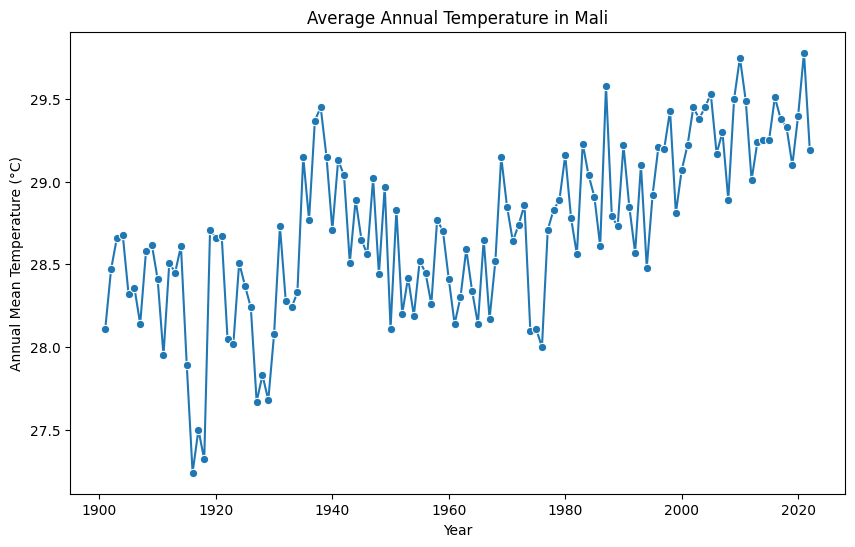

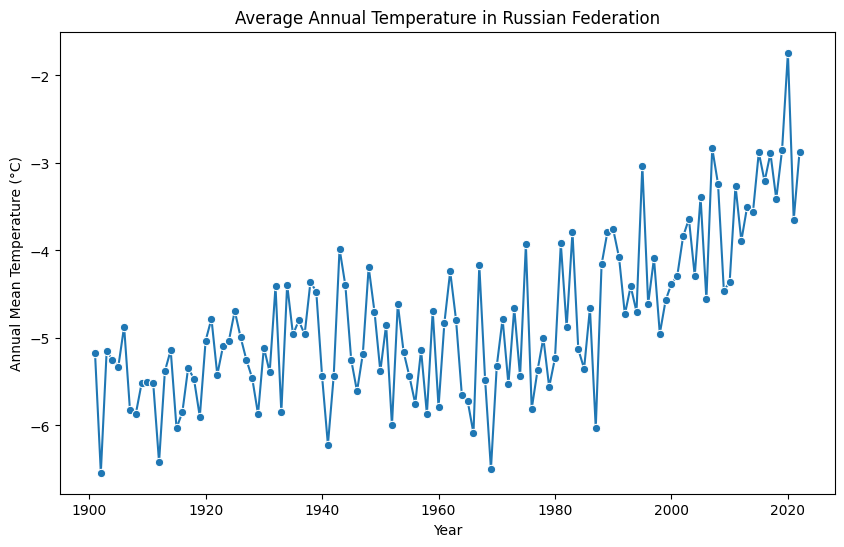

In [ ]:
hottest_country = cityTemp.groupby('Country')['Annual Mean'].mean().idxmax()
coldest_country = cityTemp.groupby('Country')['Annual Mean'].mean().idxmin()

print(hottest_country)
print(coldest_country)

hottest_country_data = cityTemp[cityTemp['Country'] == hottest_country]
coldest_country_data = cityTemp[cityTemp['Country'] == coldest_country]

plt.figure(figsize=(10, 6))
sns.lineplot(data=hottest_country_data, x='Year', y='Annual Mean', marker='o')
plt.title(f'Average Annual Temperature in {hottest_country}')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=coldest_country_data, x='Year', y='Annual Mean', marker='o')
plt.title(f'Average Annual Temperature in {coldest_country}')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.show()


In [12]:
!jupyter nbconvert --to html /content/mileston2.ipynb

[NbConvertApp] Converting notebook /content/mileston2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 525382 bytes to /content/mileston2.html


OUR MODEL:

The first idea is to explore whether changes in the global mean sea level can predict annual temperature variations across countries. In this model, the independent variable would be the global mean sea level, and the dependent variable would be the annual temperature. We would use a linear regression model to determine the strength and direction of the relationship between sea level and temperature. The rationale behind this model is the potential predictive relationship suggested by the correlation between rising sea levels and temperature trends observed in the data. This model could help us understand how fluctuations in sea levels might be indicative of temperature changes.

The second idea is to classify countries into different temperature categories (e.g., low, medium, high-temperature regions) based on their annual mean temperature. In this model, independent variables would include annual temperature and global mean sea level, and the dependent variable would be a categorical variable representing the temperature category (low, medium, or high). A classification algorithm like decision trees or logistic regression could be used to assign countries to different temperature regions. This model would provide insights into how temperature is distributed across countries and regions, helping to identify areas most impacted by climate change. This classification approach could be particularly valuable for understanding vulnerability to climate change and targeting adaptation measures accordingly.